In [20]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from math import sqrt
from sklearn import preprocessing
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import norm, skew
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [21]:
train_df = pd.read_csv('../Black Friday/BlackFriday.csv')
train_df = train_df[:200000]
train_df = train_df.rename(columns={'Stay_In_Current_City_Years':'C_Years'})
copy = train_df[['User_ID','Product_ID']].copy()
train_df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
le = preprocessing.LabelEncoder()

In [22]:
train_df.shape

(200000, 10)

In [23]:
train_df.head(10)

,Gender,Age,Occupation,City_Category,C_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [24]:
train_df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,200000.000000,200000.000000,200000.000000,138024.000000,61304.000000,200000.000000
mean,8.086030,0.409200,5.289145,9.844563,12.652404,9323.773765
std,6.533938,0.491687,3.743880,5.084404,4.123064,4978.055234
min,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5860.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12067.000000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [25]:
train_df.describe(include=['O'])

,Gender,Age,City_Category,C_Years
count,200000,200000,200000,200000
unique,2,7,3,5
top,M,26-35,B,1
freq,150715,79800,84036,70095


In [26]:
train_df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
City_Category              0
C_Years                    0
Marital_Status             0
Product_Category_1         0
Product_Category_2     61976
Product_Category_3    138696
Purchase                   0
dtype: int64

In [27]:
train_df.shape

(200000, 10)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


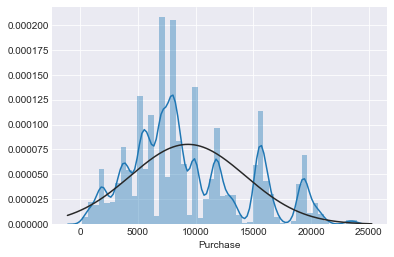

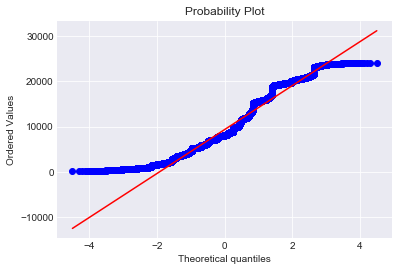

In [28]:
sns.distplot(train_df['Purchase'] , fit=norm);
(mu, sigma) = norm.fit(train_df['Purchase'])
fig = plt.figure()
res = stats.probplot(train_df['Purchase'], plot=plt)
plt.show()

In [29]:
train_df['Purchase'], lam = boxcox(train_df['Purchase'])
print('Lambda: %f' % lam)

Lambda: 0.489146


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


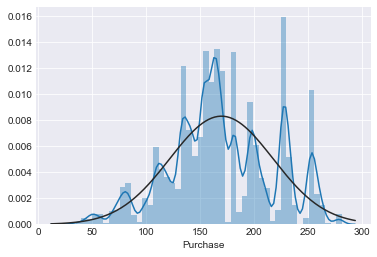

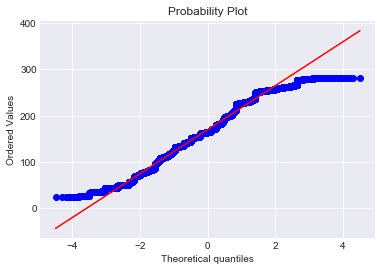

In [30]:
sns.distplot(train_df['Purchase'] , fit=norm);
(mu, sigma) = norm.fit(train_df['Purchase'])
fig = plt.figure()
res = stats.probplot(train_df['Purchase'], plot=plt)
plt.show()

In [31]:
train_df['Purchase'].describe()

count    200000.000000
mean        169.888561
std          47.923832
min          24.230405
25%         140.389373
50%         164.422945
75%         200.751338
max         281.602534
Name: Purchase, dtype: float64

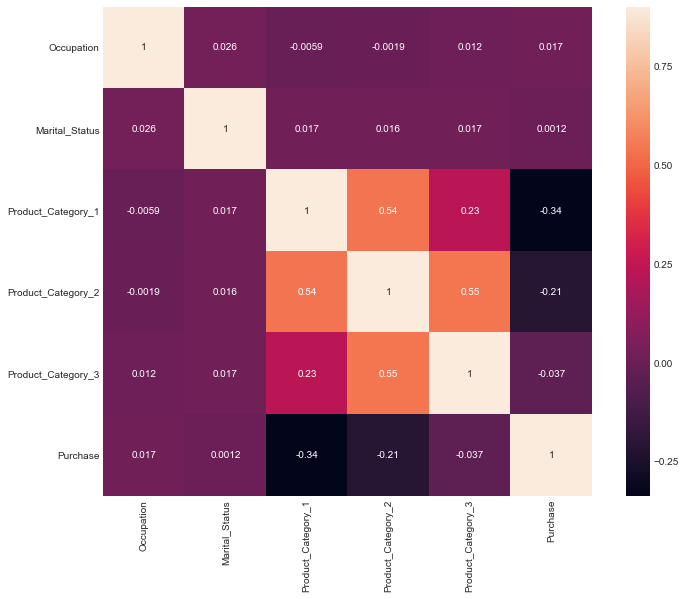

In [32]:
corrmat = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,annot=True, square=True)

In [33]:
train_df.head(1)

,Gender,Age,Occupation,City_Category,C_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,167.52456


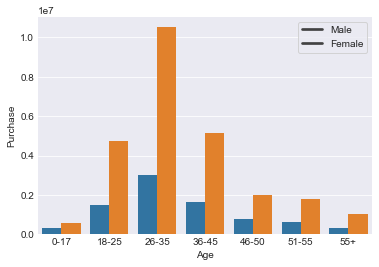

In [34]:
df = train_df.groupby(['Age','Gender'], as_index=False).agg({'Purchase':np.sum})
sns.barplot('Age','Purchase',hue='Gender',data=df)
plt.legend(['Male','Female'],frameon=True)
plt.show()

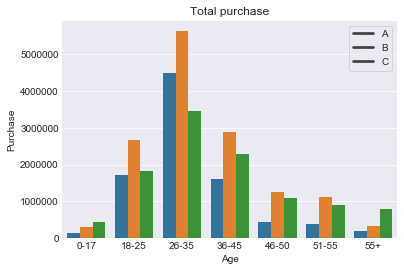

In [35]:
df = train_df.groupby(['Age','City_Category'], as_index=False).agg({'Purchase':np.sum})
sns.barplot('Age','Purchase',hue='City_Category',data=df)
plt.title('Total purchase')
plt.legend(['A','B','C'],frameon=True)
plt.show()

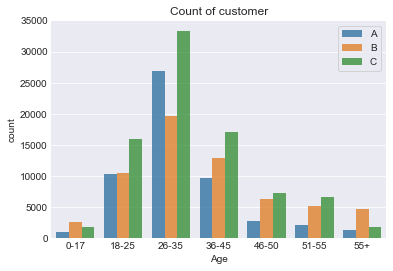

In [36]:
sns.countplot('Age',order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+'],hue='City_Category',data=train_df,alpha = 0.8)
plt.title('Count of customer')
plt.legend(['A','B','C'],frameon=True)
plt.show()

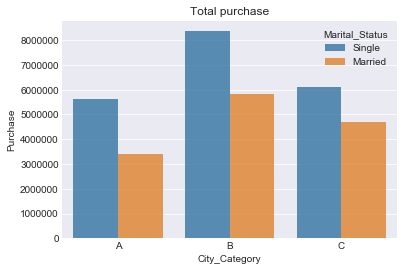

In [37]:
df = train_df.groupby(['City_Category','Marital_Status'], as_index=False).agg({'Purchase':np.sum})
df['Marital_Status']=np.where(df['Marital_Status'] == 0,'Single','Married')
sns.barplot('City_Category','Purchase',hue='Marital_Status',data=df,alpha = 0.8)
plt.title('Total purchase')
plt.show()

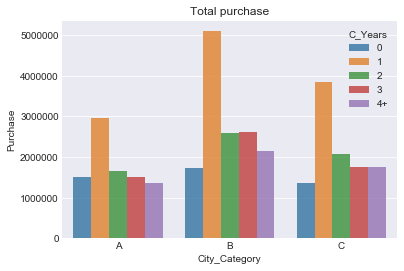

In [38]:
df = train_df.groupby(['City_Category','C_Years'], as_index=False).agg({'Purchase':np.sum})
sns.barplot('City_Category','Purchase',hue='C_Years',data=df,alpha = 0.8)
plt.title('Total purchase')
plt.show()

In [39]:
view_df=train_df.groupby( [ "Age", "Product_Category_1"] ).agg({'Purchase':'count'})
view_df

Purchase
Age   Product_Category_1          
0-17  1                       1314
      2                        289
      3                        450
      4                        296
      5                       1526
      6                        150
      7                         14
      8                        804
      9                          7
      10                        47
      11                       248
      12                        42
      13                        33
      14                        15
      15                        62
      16                        79
      17                         2
      18                        12
18-25 1                      10089
      2                       1631
      3                       1730
      4                        885
      5                      10619
      6                       1380
      7                        171
      8                       6635
      9                         23
      10                       221
      11                      1774
      12                       173
...                            ...
51-55 7                         97
      8                       3407
      9                         13
      10                       172
      11                       498
      12                       165
      13                       191
      14                        57
      15                       164
      16                       264
      17                        39
      18                       144
55+   1                       1601
      2                        358
      3                        172
      4                        113
      5                       1990
      6                        297
      7                         47
      8                       2304
      9                          2
      10                       121
      11                       206
      12                       126
      13                       115
      14                        29
      15                        84
      16                       121
      17                        26
      18                        87

[126 rows x 1 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


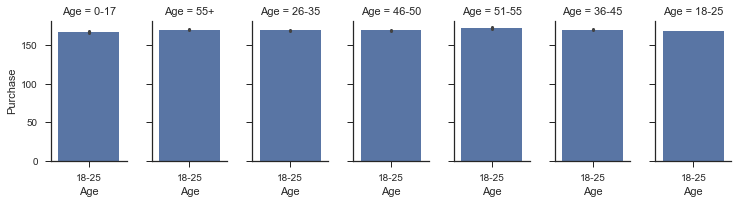

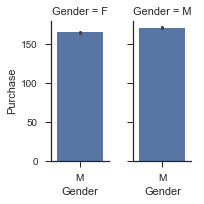

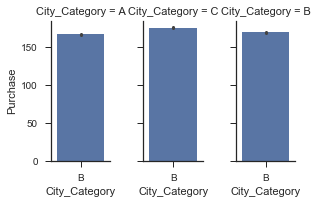

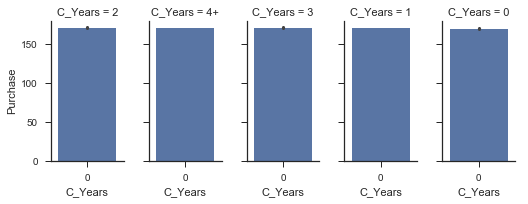

In [69]:
sns.set(style="ticks")
array =["Age","Gender","City_Category","C_Years"]
for feature in array:
  g = sns.FacetGrid(train_df, col=feature, aspect = 0.5)
  g.map(sns.barplot, feature, "Purchase")

In [40]:
train_df['C_Years']=train_df['C_Years'].replace(['0','2','3','4+'],0)
train_df['C_Years']=train_df['C_Years'].replace('1',1)

In [41]:
dummy = pd.get_dummies(train_df['Gender'])
train_df = pd.concat([train_df,dummy],axis=1)
train_df.drop(['Gender'], axis=1,inplace = True)

In [42]:
dummy = pd.get_dummies(train_df['City_Category'])
train_df = pd.concat([train_df,dummy],axis=1)
train_df.drop(['City_Category'], axis=1,inplace = True)

In [43]:
train_df.drop(['Occupation','Product_Category_3'], axis=1,inplace = True)

In [44]:
train_df['Age'] = le.fit_transform(train_df['Age'])

train_df.head(10)

,Age,C_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,A,B,C
0,0,0,0,3,NaN,167.524560,1,0,1,0,0
1,0,0,0,1,6.0,224.990637,1,0,1,0,0
2,0,0,0,12,NaN,69.206335,1,0,1,0,0
3,0,0,0,12,14.0,59.583214,1,0,1,0,0
4,6,0,0,8,NaN,163.500944,0,1,0,0,1
5,2,0,0,1,2.0,225.187813,0,1,1,0,0
6,4,0,1,1,8.0,252.571990,0,1,0,1,0
7,4,0,1,1,15.0,229.717443,0,1,0,1,0
8,4,0,1,1,16.0,228.512876,0,1,0,1,0
9,2,1,1,8,NaN,162.501984,0,1,1,0,0


In [45]:
array = ['Product_Category_2']
for feature in array:
  train_df[feature].fillna(1, inplace = True)
    

In [46]:
train_df.isnull().sum()

Age                   0
C_Years               0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Purchase              0
F                     0
M                     0
A                     0
B                     0
C                     0
dtype: int64

In [47]:
X = train_df.drop(["Purchase"],axis = 1)
y = train_df["Purchase"]
y=y.astype('int')
X.shape,y.shape

((200000, 10), (200000,))

In [48]:
k_fold = KFold(len(y), n_folds=10, shuffle=False, random_state=0)

In [49]:
naive_bayes = GaussianNB()
linear_reg = LinearRegression()
xgb = XGBRegressor()
random_forest= RandomForestRegressor()

In [80]:
score = sqrt(abs(cross_val_score(naive_bayes, X, y, cv=k_fold,scoring='neg_mean_squared_error').mean()))
print('Score: {:.2f}'.format(score))

Score: 49.86


In [81]:
score = sqrt(abs(cross_val_score(linear_reg, X, y, cv=k_fold,scoring='neg_mean_squared_error').mean()))
print('Score: {:.2f}'.format(score))

Score: 44.95


In [82]:
parameters = {'booster':['gbtree','gblinear'],
              'max_depth':[2,3,4,5,6,7,8],
                  'learning_rate':[0.25,0.2,0.15,0.1,0.05]}
grid_obj = GridSearchCV(estimator = xgb, param_grid = parameters,scoring = 'neg_mean_squared_error' )
grid_fit = grid_obj.fit(X, y)
best_xgb = grid_fit.best_estimator_
score = grid_fit.best_score_
print('Best parameter: {}'.format(best_xgb))
print('Best score: {:.2f}'.format(sqrt(abs(score))))

Best parameter: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.15, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best score: 28.37


In [83]:
parameters = {'n_estimators':[60,80,100,120,140],
              'max_depth':[6,7,8]}
grid_obj = GridSearchCV(estimator = random_forest, param_grid = parameters,scoring = 'neg_mean_squared_error' )
grid_fit = grid_obj.fit(X, y)
best_forest = grid_fit.best_estimator_
score = grid_fit.best_score_
print('Best parameter: {}'.format(best_forest))
print('Best score: {:.2f}'.format(sqrt(abs(score))))

Best parameter: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Best score: 28.50


In [53]:
train_sizes, train_scores, test_scores = learning_curve(XGBRegressor(booster='gbtree',max_depth=6,learning_rate=0.15), X, y, cv=3, scoring='neg_mean_squared_error')

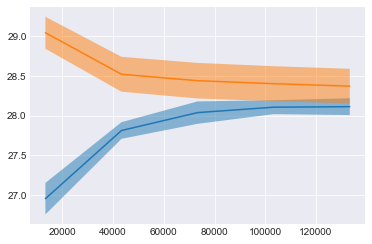

In [54]:
train_scores = np.sqrt(abs(train_scores))
test_scores = np.sqrt(abs(test_scores))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean)
plt.plot(train_sizes, test_mean)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,alpha=0.5)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.5)
plt.show()

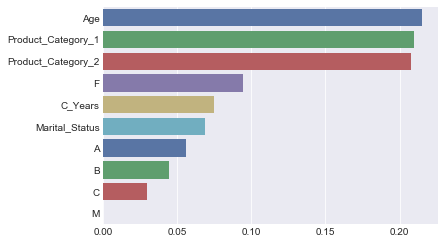

In [56]:
model = XGBRegressor(booster='gbtree',max_depth=6,learning_rate=0.15).fit(X,y)
feature_importance = model.feature_importances_
order = pd.Series(feature_importance,index=X.columns).sort_values(ascending=False)
plt.figure()
sns.barplot(y=order.index,x=order.values,palette='deep')